**1**. (20 points) 

Create a `pandas` DataFrame with these values

|name|a-b-|a-b+|a+b-|a+b+|
|-|-|-|-|-|
|ann|1|2|3|4|
|bob|5|6|7|8|

Now convert it to another DataFrame so that it looks like

|    | name   | a   | b   |   value |
|---:|:-------|:----|:----|--------:|
|  0 | ann    | -   | -   |       1 |
|  2 | ann    | -   | +   |       2 |
|  4 | ann    | +   | -   |       3 |
|  6 | ann    | +   | +   |       4 |
|  1 | bob    | -   | -   |       5 |
|  3 | bob    | -   | +   |       6 |
|  5 | bob    | +   | -   |       7 |
|  7 | bob    | +   | +   |       8 |

Note - all information used to construct the second DataFrame must be derived from the first one.

In [30]:
import numpy as np
import pandas as pd

# Create dataframe
df = pd.DataFrame(np.array(range(1,9)).reshape(2,4), columns = ['a-b-','a-b+','a+b-','a+b+'])
names = pd.DataFrame(dict(name = ['ann','bob']))
df = names.join(df)
print(df.to_string(index=False))

# Convert to another dataframe
df = pd.melt(df, id_vars='name').sort_values(by='name')
df.variable = df.variable.str.replace('a','b')
df[['del','a','b']] = df.variable.str.split('b').apply(pd.Series, index = ['del','a','b'])
df = df.drop(columns = ['variable','del'])

# Modify the column order
cols = df.columns.tolist()
cols_new = [cols[i] for i in [0,2,3,1]]
df = df[cols_new]
df

name  a-b-  a-b+  a+b-  a+b+
 ann     1     2     3     4
 bob     5     6     7     8


,name,a,b,value
0,ann,-,-,1
2,ann,-,+,2
4,ann,+,-,3
6,ann,+,+,4
1,bob,-,-,5
3,bob,-,+,6
5,bob,+,-,7
7,bob,+,+,8


**2**. (20 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [29]:
import numpy as np

def toss(k = 100):
    
    res = np.random.random(k) < 0.5
    
    max_len = 0
    length = 0
    for i in range(k):
        if res[i]: 
            length += 1
        else:
            max_len = max(max_len, length)
            length = 0
    
    max_len = max(max_len, length)
    return max_len

n = 10000
k = 100

times = [0] * (k + 1)
for i in range(n):
    times[toss(k)] += 1

max_times = max(times)
print([i for i, j in enumerate(times) if j == max_times])

[5]


**3**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [37]:
import numpy as np

n = 1000
marked = [False] * n

for i in range(2, int(np.sqrt(n)) + 1):
    if not marked[i]:
        for j in range(2*i, n, i):
            marked[j] = True

primes = [i for i in range(2, n) if not marked[i]]
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


**4**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
```

which you feed into your `make_plots` function
```python
make_plots(rules, niter)
```

You may, of course, write other helper functions to keep your code modular.

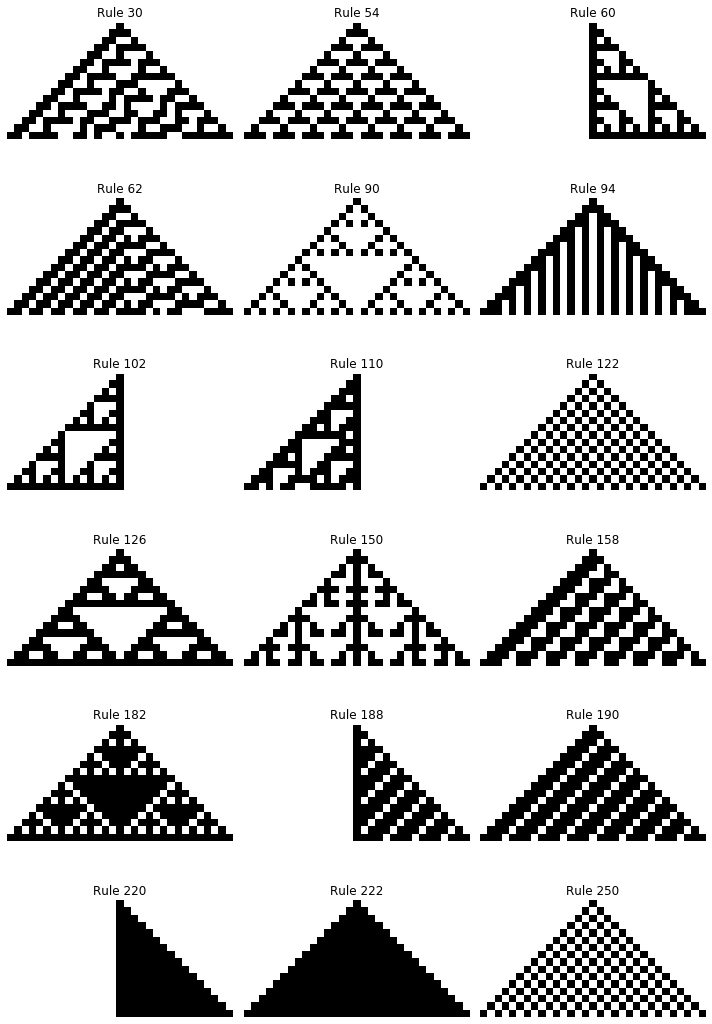

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# generate rules
def gen_rules(num):
    
    pattern = [
        (1,1,1),
        (1,1,0),
        (1,0,1),
        (1,0,0),
        (0,1,1),
        (0,1,0),
        (0,0,1),
        (0,0,0)
    ]
    
    bin_num = [int(i) for i in list(format(num, "#010b")[2:])]
    mapping_rules = dict(zip(pattern, bin_num))
    return mapping_rules

# generate boards
def make_plots(rules, niter):
    
    fig, ax = plt.subplots(nrows = 6, ncols = 3, figsize = (10, 15))
    
    for k, rule in enumerate(rules):
        
        board = np.zeros((niter, 2 * niter + 1)) # with zero padding for two sides
        board[0][niter] = 1
        
        mapping = gen_rules(rule)
        
        for i in range(1, niter):
            for j in range(1, 2 * niter):
                board[i][j] = mapping[(board[i - 1][j - 1], board[i - 1][j], board[i - 1][j + 1])]
        
        ax[k // 3, k % 3].imshow(board[:,1:-1], cmap="Greys")
        ax[k // 3, k % 3].set_title('Rule %i' % rule)
        ax[k // 3, k % 3].axis('off')
    
    plt.tight_layout()
    plt.show()

rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, 16)
